### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,w_material_early,...,b_piece_activity,w_doubled_pawns,b_doubled_pawns,doubled_pawns_diff,w_isolated_pawns,b_isolated_pawns,isolated_pawns_diff,both_castled_early,total_captures_early,activity_diff
0,2487,2596,1,0,109,2541.5,0,-109,0,20.0,...,36.0,0.0,0.0,0.0,1.0,1.0,0.0,0,15.0,0.0
1,2542,2433,2,0,109,2487.5,1,109,9,16.0,...,20.0,0.0,0.0,0.0,1.0,2.0,-1.0,0,15.0,11.0
2,2404,2534,0,0,130,2469.0,0,-130,0,21.0,...,34.0,0.0,0.0,0.0,1.0,1.0,0.0,1,9.0,-1.0
3,2860,2922,1,0,62,2891.0,0,-62,0,33.0,...,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0
4,2752,2395,2,0,357,2573.5,1,357,0,18.0,...,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0,14.0,10.0


### 2. Prepare data

In [3]:
X = df.drop(["ResultNumeric"], axis=1)
y = df["ResultNumeric"]

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (2435474, 63)
Target: (2435474,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # 20% for testing
    random_state=42,
    stratify=y,
)

### 4. Train model

In [5]:
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    eval_metric="mlogloss",
)

In [6]:
start_time = time.time()

xgb_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(
    f"Training completed in {training_time:.2f} seconds ({training_time / 60:.2f} minutes)"
)

Training completed in 33.21 seconds (0.55 minutes)


### 5. Evaluate

In [7]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Set Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)\n")

print("Classification Report:\n")
print(
    classification_report(
        y_test, y_pred, target_names=["Black Win", "Draw", "White Win"]
    )
)


Test Set Accuracy: 0.6269 (62.69%)

Classification Report:

              precision    recall  f1-score   support

   Black Win       0.60      0.68      0.64    198257
        Draw       0.83      0.30      0.44     77234
   White Win       0.62      0.70      0.66    211604

    accuracy                           0.63    487095
   macro avg       0.69      0.56      0.58    487095
weighted avg       0.65      0.63      0.62    487095



In [8]:
df_sf = pd.read_csv("../data/chess_games_feature_60_sf.csv")
X_sf = df_sf.drop(["ResultNumeric"], axis=1)
y_sf = df_sf["ResultNumeric"]

In [9]:
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(
    X_sf, y_sf, test_size=0.2, random_state=42, stratify=y_sf
)

In [10]:
xgb_sf = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    eval_metric="mlogloss",
)

In [11]:
start = time.time()
xgb_sf.fit(X_train_sf, y_train_sf)
time_sf = time.time() - start
print(f"Training completed in {time_sf:.2f} seconds ({time_sf / 60:.2f} minutes)")

Training completed in 0.82 seconds (0.01 minutes)


In [12]:
y_pred_sf = xgb_sf.predict(X_test_sf)
acc_sf = accuracy_score(y_test_sf, y_pred_sf)
print(f"\nTest Set Accuracy: {acc_sf:.4f} ({acc_sf * 100:.2f}%)\n")

print("Classification Report:\n")
print(
    classification_report(
        y_test_sf, y_pred_sf, target_names=["Black Win", "Draw", "White Win"]
    )
)


Test Set Accuracy: 0.6234 (62.34%)

Classification Report:

              precision    recall  f1-score   support

   Black Win       0.60      0.67      0.63      4039
        Draw       0.82      0.30      0.44      1565
   White Win       0.62      0.70      0.66      4396

    accuracy                           0.62     10000
   macro avg       0.68      0.56      0.58     10000
weighted avg       0.64      0.62      0.61     10000



### 6. Confusion Matrix

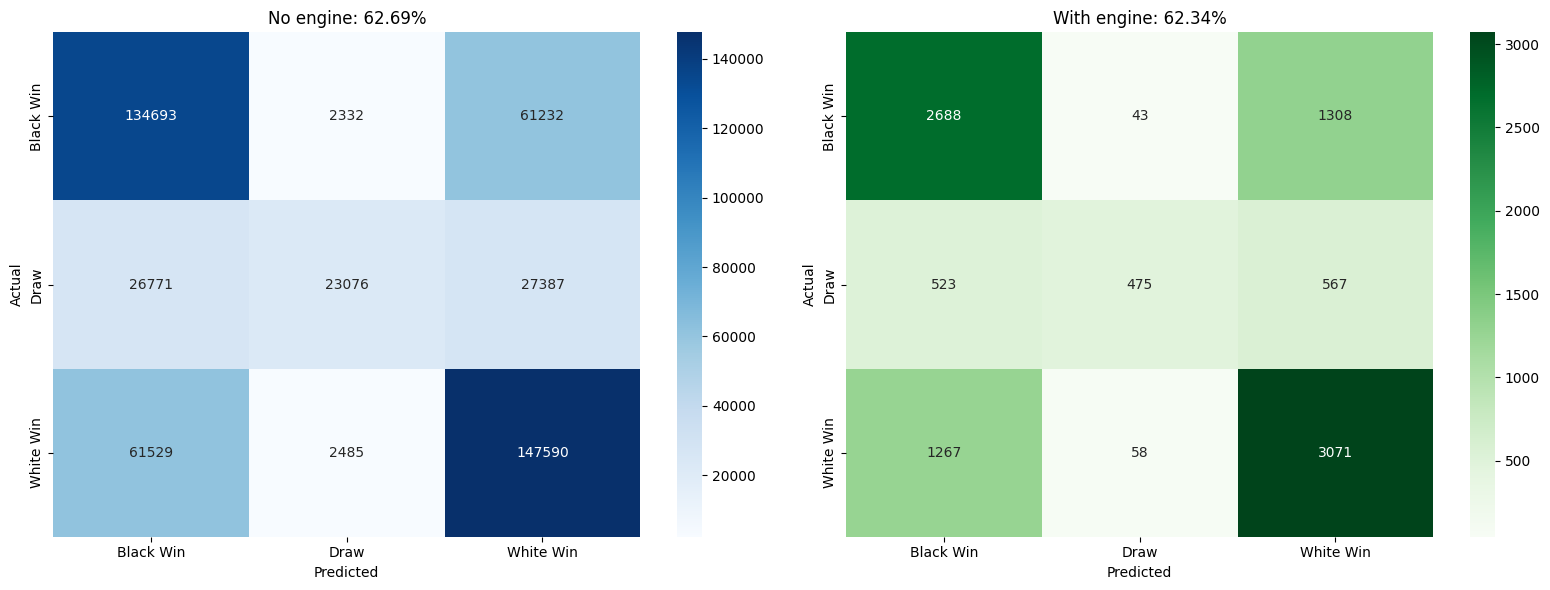

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    ax=axes[0],
    xticklabels=["Black Win", "Draw", "White Win"],
    yticklabels=["Black Win", "Draw", "White Win"],
)
axes[0].set_title(f"No engine: {accuracy * 100:.2f}%")
axes[0].set_ylabel("Actual")
axes[0].set_xlabel("Predicted")

cm_sf = confusion_matrix(y_test_sf, y_pred_sf)
sns.heatmap(
    cm_sf,
    annot=True,
    fmt="d",
    cmap="Greens",
    ax=axes[1],
    xticklabels=["Black Win", "Draw", "White Win"],
    yticklabels=["Black Win", "Draw", "White Win"],
)
axes[1].set_title(f"With engine: {acc_sf * 100:.2f}%")
axes[1].set_ylabel("Actual")
axes[1].set_xlabel("Predicted")

plt.tight_layout()
plt.show()

### 7. Feature Importance

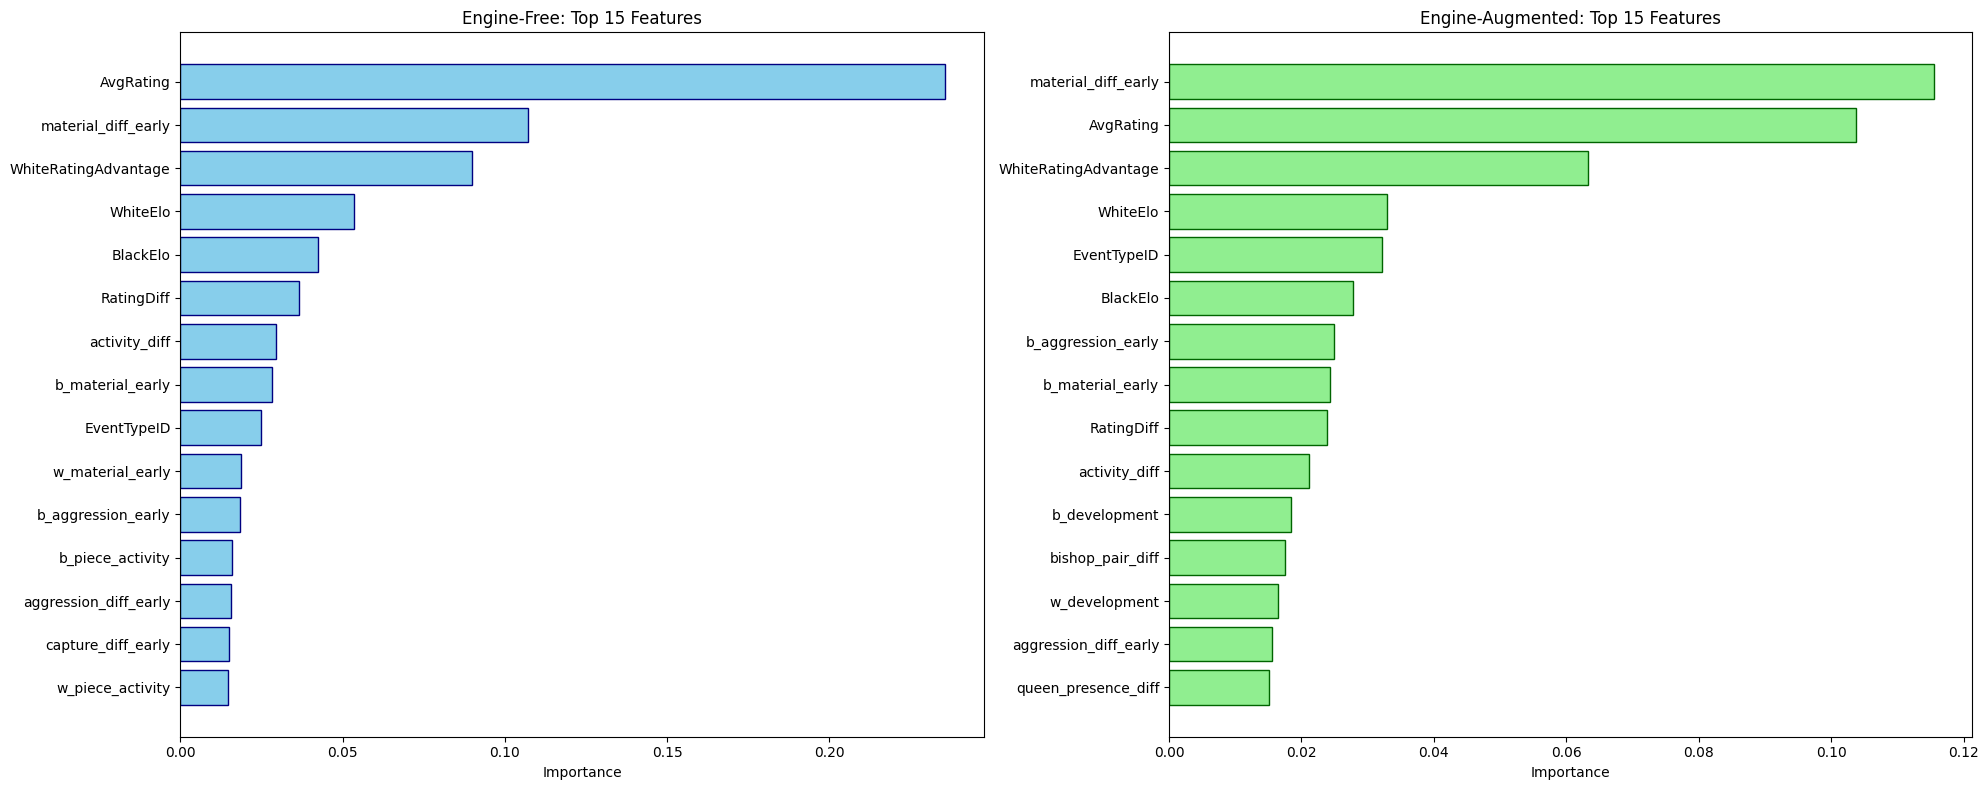

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

importance_free = (
    pd.DataFrame({"Feature": X.columns, "Importance": xgb_model.feature_importances_})
    .sort_values("Importance", ascending=True)
    .tail(15)
)

axes[0].barh(
    importance_free["Feature"],
    importance_free["Importance"],
    color="skyblue",
    edgecolor="navy",
)
axes[0].set_title("Engine-Free: Top 15 Features")
axes[0].set_xlabel("Importance")


importance_sf = (
    pd.DataFrame({"Feature": X_sf.columns, "Importance": xgb_sf.feature_importances_})
    .sort_values("Importance", ascending=True)
    .tail(15)
)

axes[1].barh(
    importance_sf["Feature"],
    importance_sf["Importance"],
    color="lightgreen",
    edgecolor="darkgreen",
)
axes[1].set_title("Engine-Augmented: Top 15 Features")
axes[1].set_xlabel("Importance")

plt.tight_layout()
plt.show()